## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [ ]:
# Importing necessary libraries for numerical operations, plotting, and operating system interactions
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# the link to the dataset: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Unzipping the dataset file located in Google Drive
!unzip "/content/drive/MyDrive/dataset.zip"

Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

Found 70295 images belonging to 38 classes.
In Image dataset, Class indices of: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacte

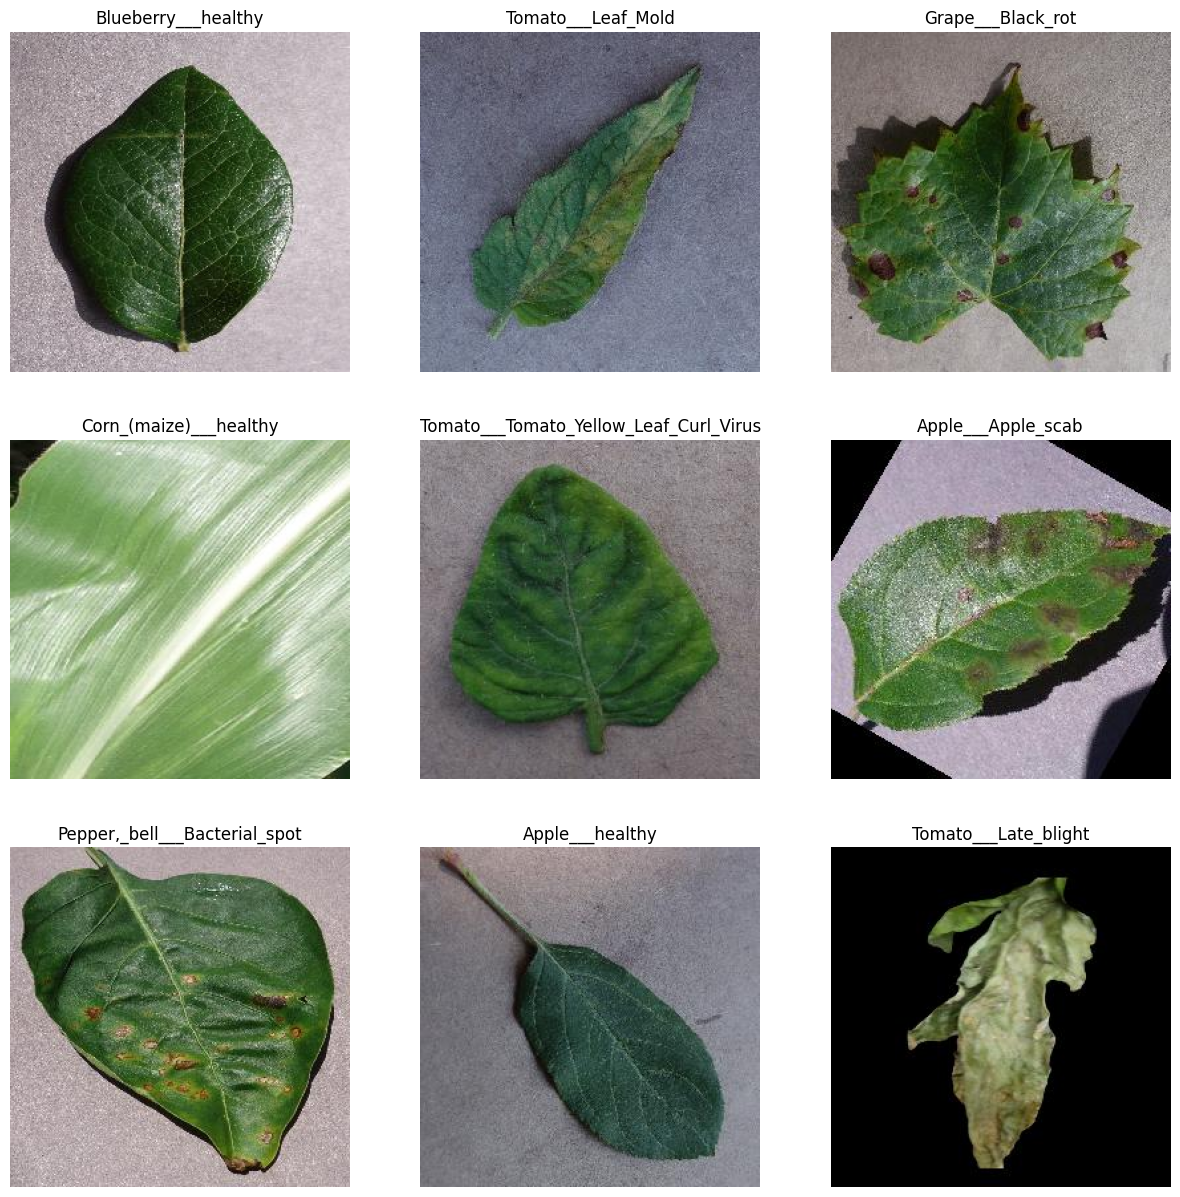

In [ ]:
# Directory containing the dataset
dataset_directory = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# ImageDataGenerator for preprocessing images
data_generator = ImageDataGenerator(rescale=1./255)

# Creating a data loader for the dataset
data_loader = data_generator.flow_from_directory(
    dataset_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Printing the class indices
print("In Image dataset, Class indices of:",data_loader.class_indices,"\n")

#function to visualise data
def visualize_images(image_batch, label_batch, class_indices):
    plt.figure(figsize=(15, 15))
    class_names = list(class_indices.keys())
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i])
        label = class_names[np.argmax(label_batch[i])]
        plt.title(label)
        plt.axis("off")
    plt.show()

# Loading a batch of images and labels
images, labels = next(data_loader)

# Visualizing the loaded images
visualize_images(images, labels, data_loader.class_indices)


### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [ ]:
# Getting the shape of each image in the batch
image_sizes = [img.shape for img in images]

# Finding unique sizes of images in the batch
unique_sizes = set(image_sizes)

# Calculating mean values across channels for the batch of images
mean_values = np.mean(images, axis=(0, 1, 2))

# Calculating standard deviation across channels for the batch of images
std_values = np.std(images, axis=(0, 1, 2))


print(f"Unique image sizes in the batch: {unique_sizes}")
print(f"Mean values across channels: {mean_values}")
print(f"Standard deviation across channels: {std_values}")

# Approximating the number of samples per class in the batch
samples_per_class = len(images) / len(data_loader.class_indices)
print(f"Approximate number of samples per class: {samples_per_class}")

Unique image sizes in the batch: {(256, 256, 3)}
Mean values across channels: [0.4549675  0.47357878 0.4123873 ]
Standard deviation across channels: [0.22482412 0.20571335 0.23329636]
Approximate number of samples per class: 0.8421052631578947


Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

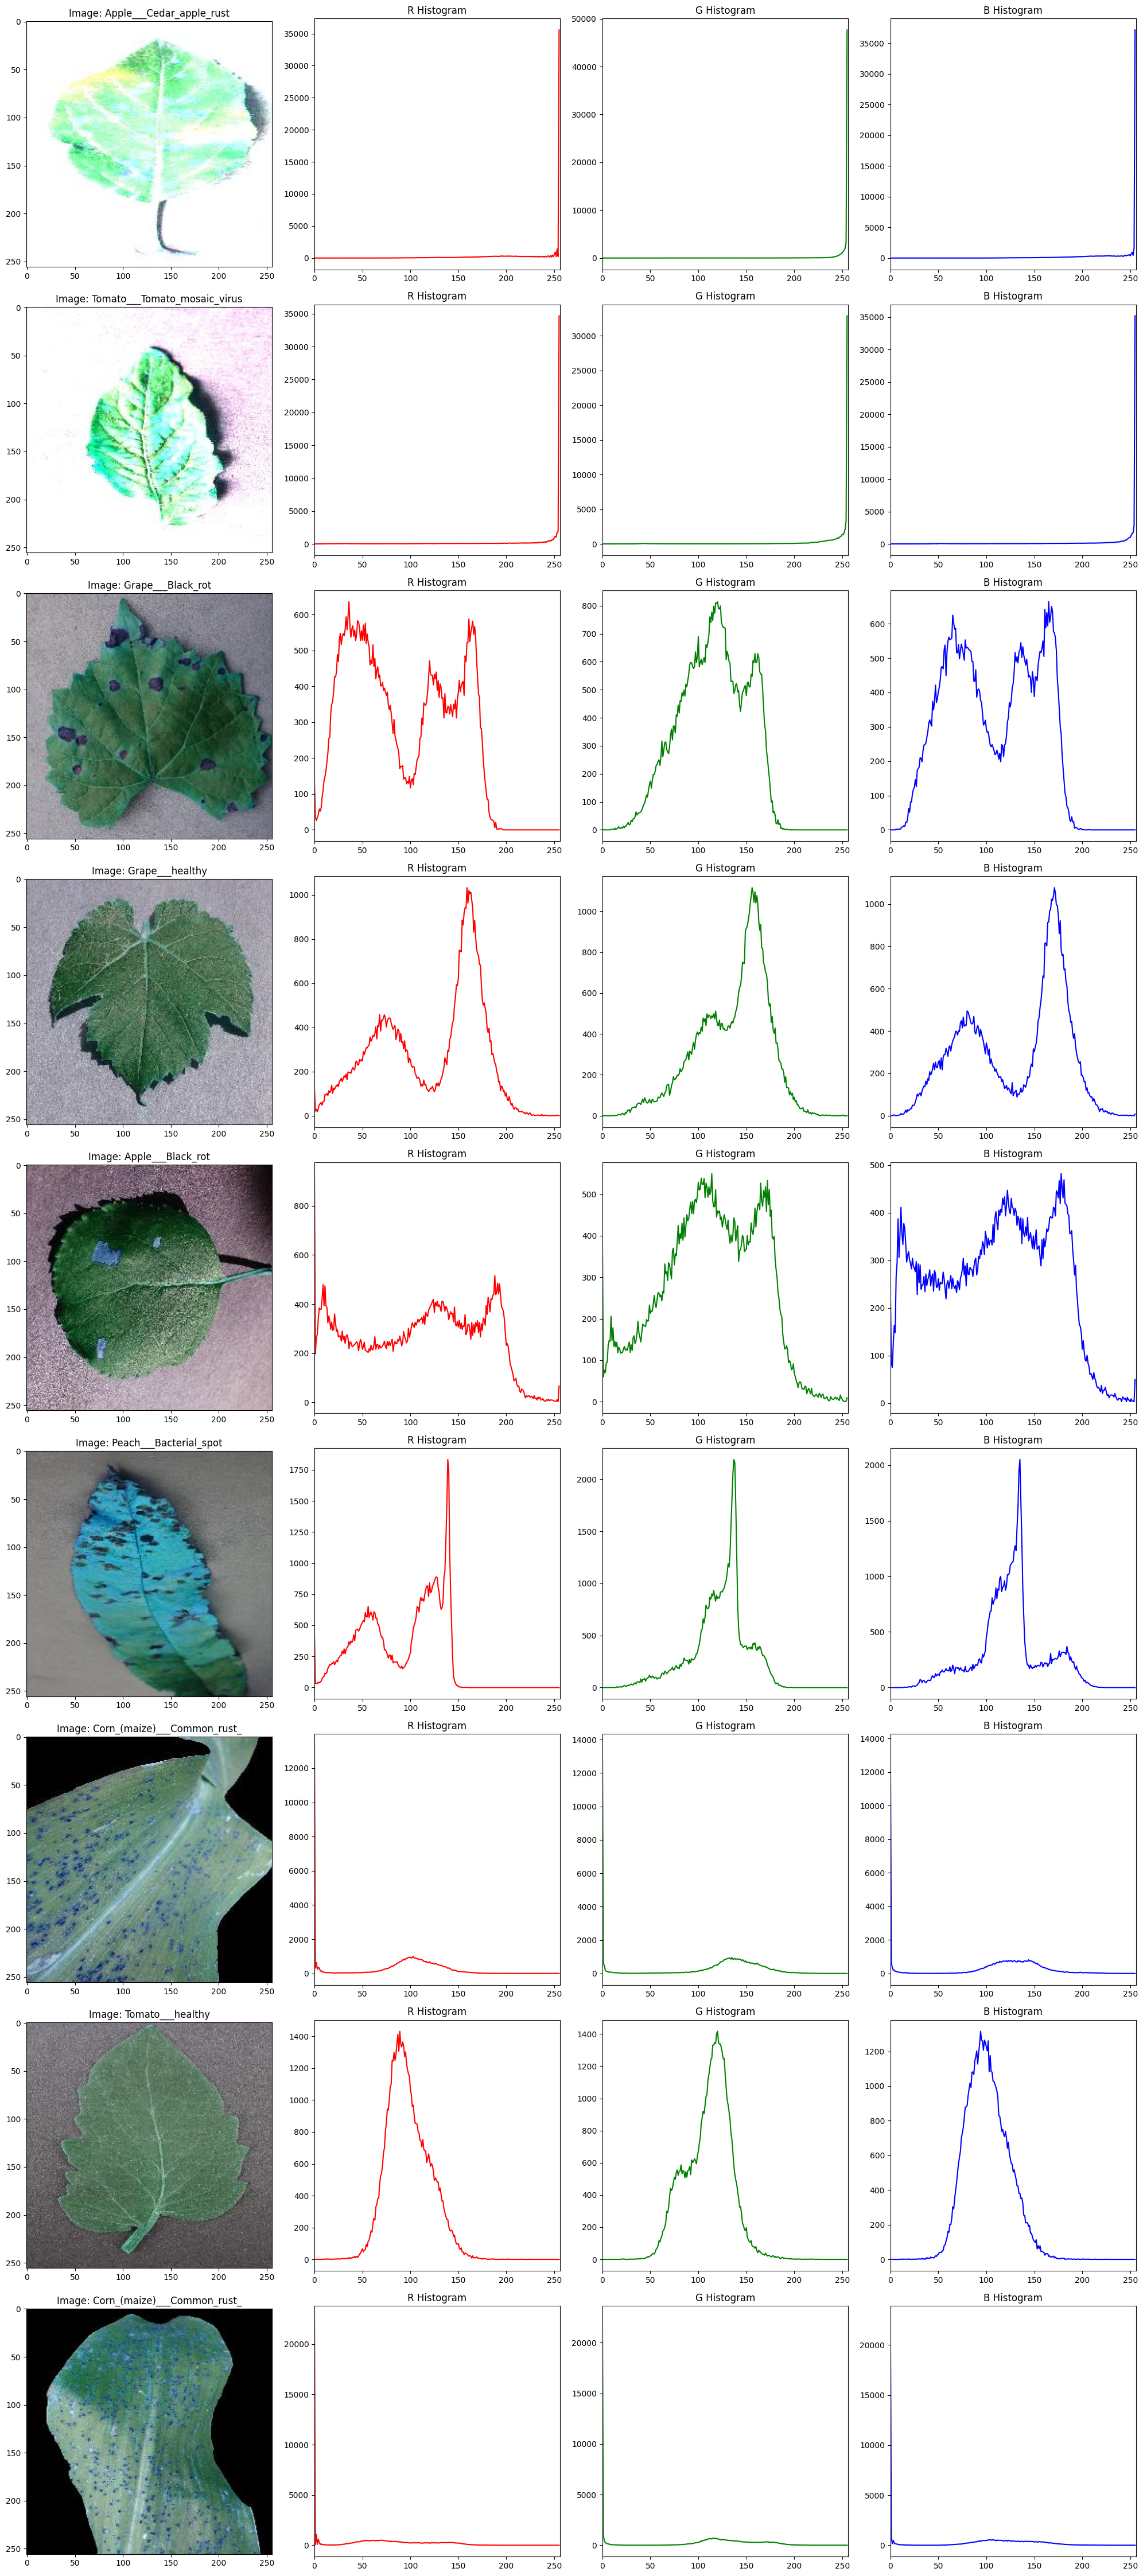

In [ ]:
import cv2

#function to visualize the images with histograms
def visualize_images_with_histograms(image_batch, label_batch, class_indices, num_images=9):
    num_images = min(num_images, len(image_batch))

    # Creating subplots for images and histograms
    fig, axs = plt.subplots(num_images, 4, figsize=(20, 5 * num_images))
    class_names = list(class_indices.keys())

    for i in range(num_images):
        img = image_batch[i]
        label = class_names[np.argmax(label_batch[i])]
        img = (img * 255).astype('uint8')

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Displaying the image
        axs[i, 0].imshow(img_rgb)
        axs[i, 0].set_title(f'Image: {label}')
        axs[i, 0].axis('on')

        # Plotting histograms for each channel (R, G, B)
        colors = ('r', 'g', 'b')
        for j, col in enumerate(colors):
            hist = cv2.calcHist([img_rgb], [j], None, [256], [0, 256])
            axs[i, j + 1].plot(hist, color=col)
            axs[i, j + 1].set_xlim([0, 256])
            axs[i, j + 1].set_title(f'{col.upper()} Histogram')
            axs[i, j + 1].axis('on')

    plt.tight_layout()
    plt.show()


# Loading a batch of images and labels
images, labels = next(data_loader)

# Visualizing the images with histograms
visualize_images_with_histograms(images, labels, data_loader.class_indices)


**Analysis of Plant Leaf Health through Color Histograms**

The provided image showcases a collection of plant leaf images paired with their color histograms, offering insights into leaf health. Histograms associated with diseased leaves, like those with Septoria leaf spot or early blight, typically show darker pixel intensity distributions, revealing the characteristic signs of disease presence. In contrast, histograms for healthy leaves show more evenly distributed pixel intensities, indicative of their healthy state. These data patterns are valuable for developing machine learning algorithms aimed at identifying and categorizing plant diseases based on photographic imagery.

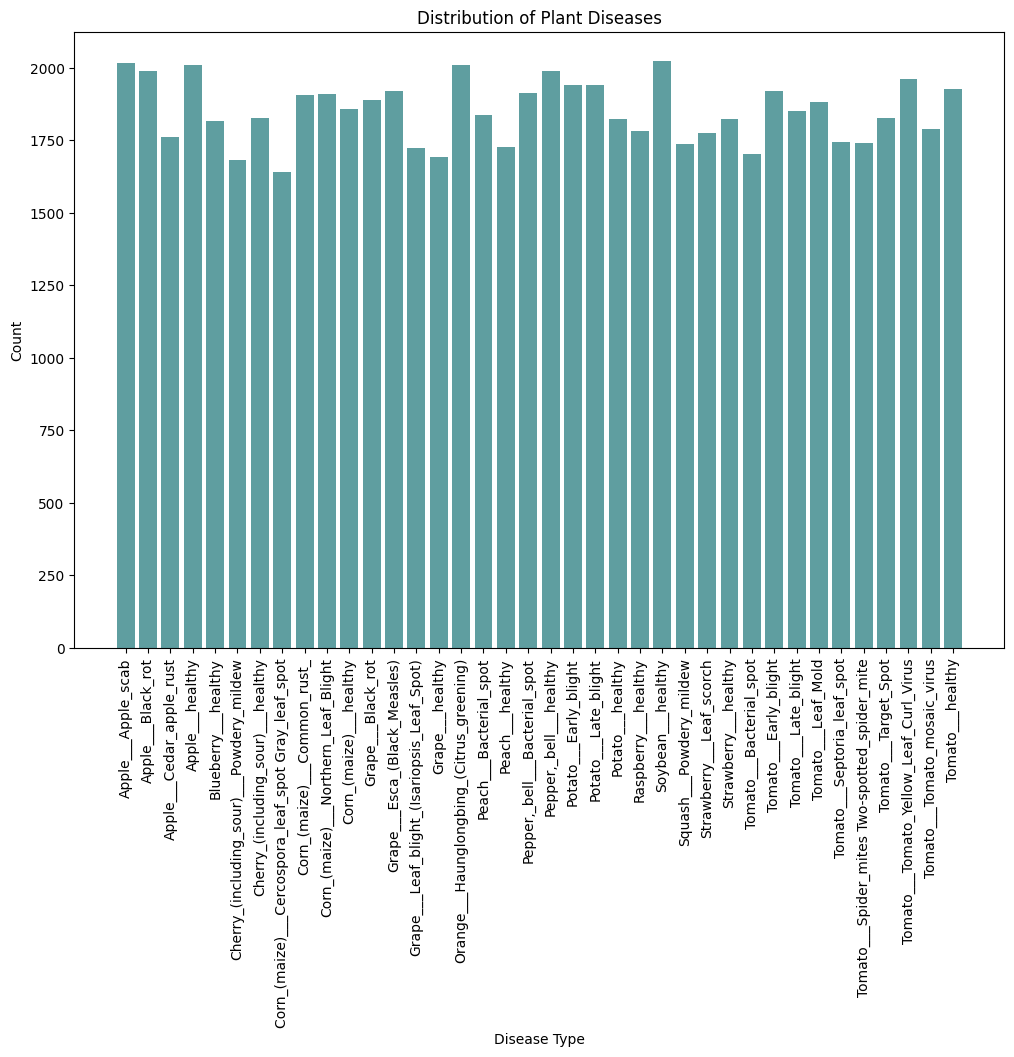

In [ ]:
from collections import Counter

# Getting class indices from the data loader
class_indices = data_loader.class_indices

# Creating a dictionary to map indices to class labels
index_to_class = {v: k for k, v in class_indices.items()}

# Getting the class labels from the data loader
class_labels = data_loader.classes

# Counting the occurrences of each class label
label_counts = Counter(class_labels)

# Creating lists of class names and their corresponding counts
class_names = [index_to_class[index] for index in range(len(class_indices))]
counts = [label_counts[index] for index in range(len(class_indices))]

# Plotting the distribution of plant diseases
plt.figure(figsize=(12, 8))
plt.bar(class_names, counts, color='cadetblue')
plt.title('Distribution of Plant Diseases')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Comparative Visualization of Plant Disease Frequency**

The provided bar chart illustrates the frequency distribution of various plant diseases and healthy plant instances within a given dataset. The data is categorized by plant types such as apple, cherry, corn, grape, peach, pepper, potato, strawberry, and tomato, each further detailed with disease conditions including scab, rot, blight, mildew, and other ailments. Healthy specimens are also noted for comparison. The vertical axis quantifies the count of occurrences for each disease or healthy condition, while the horizontal axis lists these conditions by plant type.

In [ ]:
import plotly.graph_objects as go

class_indices = data_loader.class_indices

# Inverts the class_indices dictionary to create a mapping from indices to class names.
index_to_class = {v: k for k, v in class_indices.items()}

# for a batch of images taking the argmax to get the most likely class index for each image.
class_indices_batch = np.argmax(labels, axis=1)

# Converts the list of class indices for the batch into their corresponding class names.
class_names_batch = [index_to_class[idx] for idx in class_indices_batch]

# Sets up the dimensions for the parallel categories diagram. It creates two categories:
# 'Image' which is a list of image identifiers and 'Class' which are the predicted class names.
dimensions = [dict(label="Image", values=[f"Image {i+1}" for i in range(len(images))]),
              dict(label="Class", values=class_names_batch)]

# Creates a Parallel Categories Diagram using Plotly. This type of plot can help in visualizing
# high-dimensional categorical data. It's drawing lines for each image to its classified label.
fig = go.Figure(data=[go.Parcats(dimensions=dimensions,
                                 line=dict(color=class_indices_batch,
                                           colorscale='Viridis'))])

fig.update_layout(title="Parallel Categorical Plot of Image Classes in a Batch")
fig.show()

**Multivariate Analysis of Image Classification in Agricultural Data**

The provided visualization is a Parallel Categorical Plot that offers a detailed analysis of image classifications for a given batch. The plot effectively demonstrates the relationships and classifications of 32 distinct images, each corresponding to various plant-related categories. These categories range from different plant diseases such as corn blight, tomato early blight, apple scab, grape black rot, to healthy plants across various species like tomato, potato, peach, and strawberry.

Each horizontal line represents an image, extending across the chart to connect with its identified class, forming a web of intersecting lines. This intersection highlights the complexity and diversity of the classifications.

This type of visualization is particularly useful in machine learning and data science for understanding the output of classification models and for exploring the underlying structure in categorical data sets.

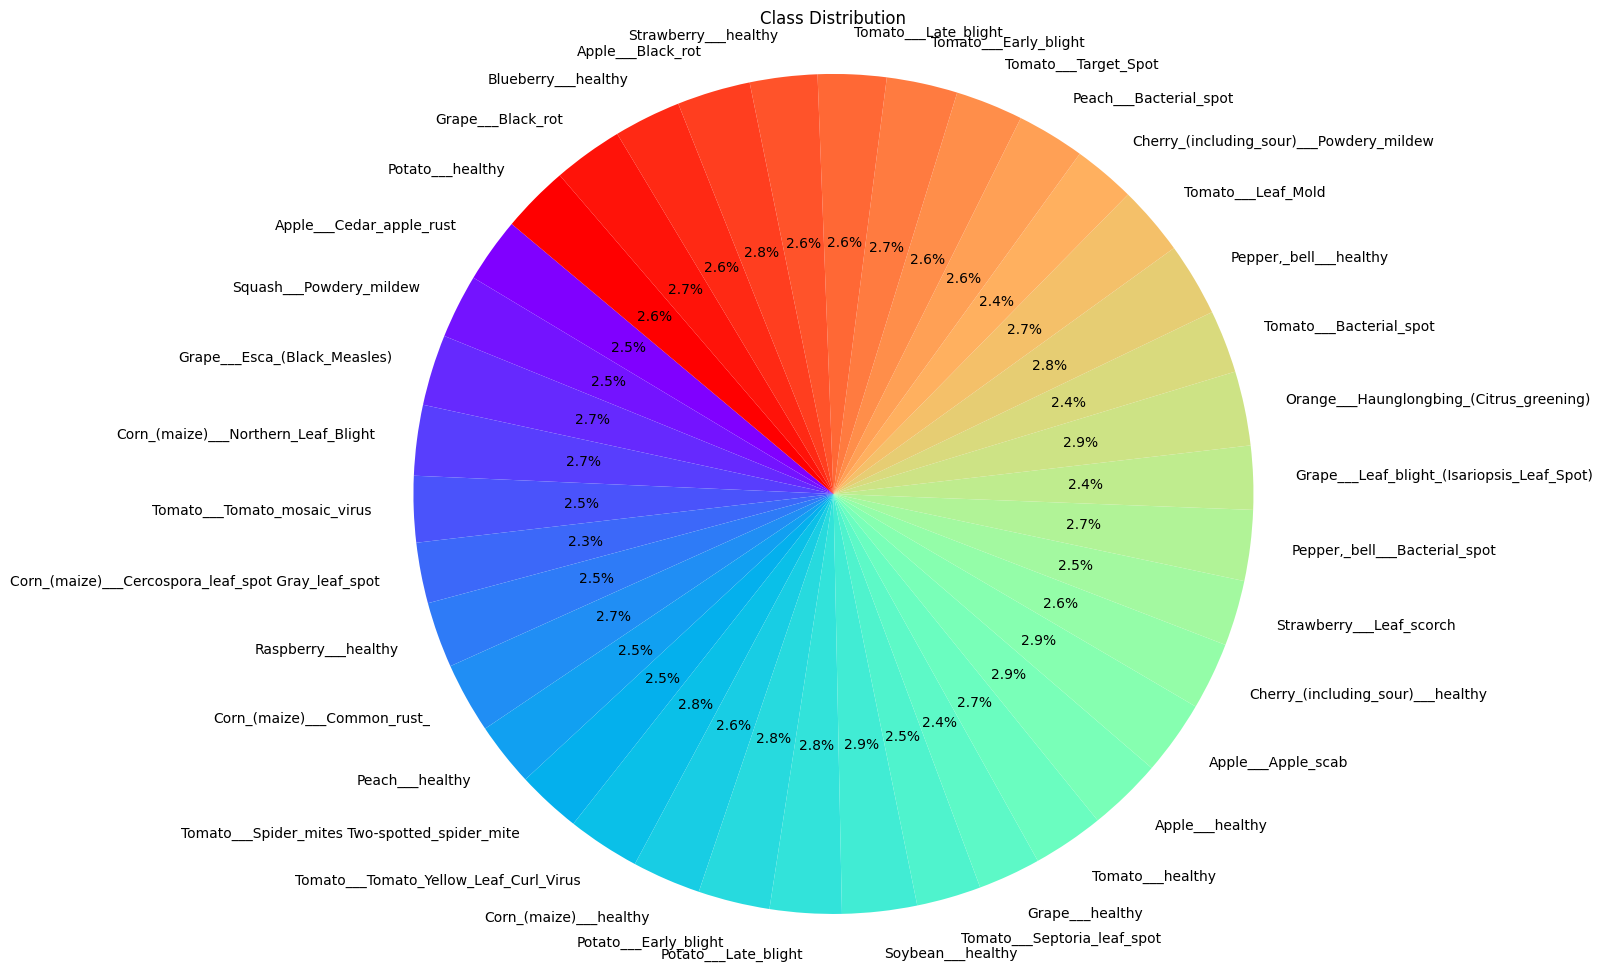

Class names:
Apple___Cedar_apple_rust
Squash___Powdery_mildew
Grape___Esca_(Black_Measles)
Corn_(maize)___Northern_Leaf_Blight
Tomato___Tomato_mosaic_virus
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Raspberry___healthy
Corn_(maize)___Common_rust_
Peach___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Corn_(maize)___healthy
Potato___Early_blight
Potato___Late_blight
Soybean___healthy
Tomato___Septoria_leaf_spot
Grape___healthy
Tomato___healthy
Apple___healthy
Apple___Apple_scab
Cherry_(including_sour)___healthy
Strawberry___Leaf_scorch
Pepper,_bell___Bacterial_spot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Tomato___Bacterial_spot
Pepper,_bell___healthy
Tomato___Leaf_Mold
Cherry_(including_sour)___Powdery_mildew
Peach___Bacterial_spot
Tomato___Target_Spot
Tomato___Early_blight
Tomato___Late_blight
Strawberry___healthy
Apple___Black_rot
Blueberry___healthy
Grape___Black_rot
Potato___healthy


In [ ]:
#a pie chart for the class distribution of your dataset:
import matplotlib.pyplot as plt
import numpy as np

# This dictionary comprehension iterates through each class directory in your dataset,
# counting the number of files in each and associating this count with the class name.
label_counts = {class_name: len(os.listdir(os.path.join(dataset_directory, class_name)))
                for class_name in os.listdir(dataset_directory)}

# Extracts the class names from the keys of the dictionary.
labels = label_counts.keys()

# Extracts the file counts from the values of the dictionary, which represent class sizes.
sizes = label_counts.values()

# Generates a sequence of colors from the rainbow color map, one for each class.
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(15, 12))

# Creates the pie chart with the sizes corresponding to class distribution, the class labels,
# assigns colors for each class, formats the percentage display, and starts the pie chart from 140 degrees.
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

print("Class names:")
for label in labels:
    print(label)


**Proportional Representation of Plant Disease Classes in Dataset**

The pie chart vividly displays the class distribution within a dataset focused on plant diseases. Each slice of the pie represents a different class, signifying either a specific plant disease or a healthy state of various plants. The colors are allocated by a gradient and each class label is annotated with a percentage, illustrating the relative frequency of each class in the dataset. The chart shows a relatively balanced representation among the classes, with no single disease or healthy state dominating the dataset.

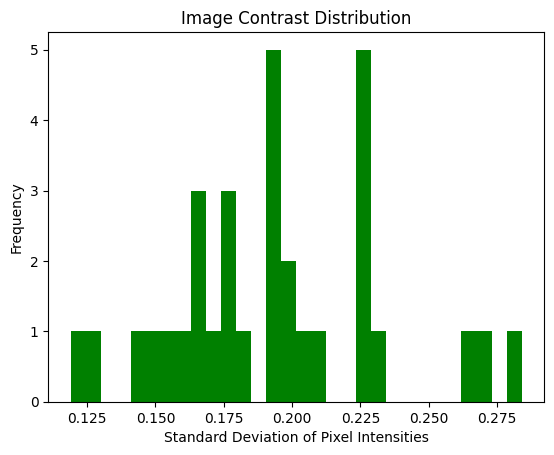

In [ ]:
#Image Contrast Distribution: to understand the variance in lighting or exposure across your dataset, which could affect model training.
def plot_contrast_distribution(images):
    # Calculate the standard deviation of pixel intensities for each image to represent its contrast.
    contrast_values = [np.std(img) for img in images]

    # Plot a histogram of these contrast values to see their distribution across the dataset.
    plt.hist(contrast_values, bins=30, color='green')
    plt.title('Image Contrast Distribution')
    plt.xlabel('Standard Deviation of Pixel Intensities')
    plt.ylabel('Frequency')
    plt.show()

images, _ = next(data_loader)
plot_contrast_distribution(images)


**Image Contrast Distribution Analysis**

The histogram visualizes the distribution of contrast within a collection of images, quantified by the standard deviation of pixel intensities. The x-axis represents the standard deviation of pixel intensities, which indicates the level of contrast in the images — the higher the value, the greater the contrast. The y-axis shows the frequency of images with corresponding contrast levels. The spread of bars across different values of standard deviation suggests variability in the image dataset’s contrast. Most images appear to have a moderate level of contrast, with few at the higher and lower ends of the spectrum.

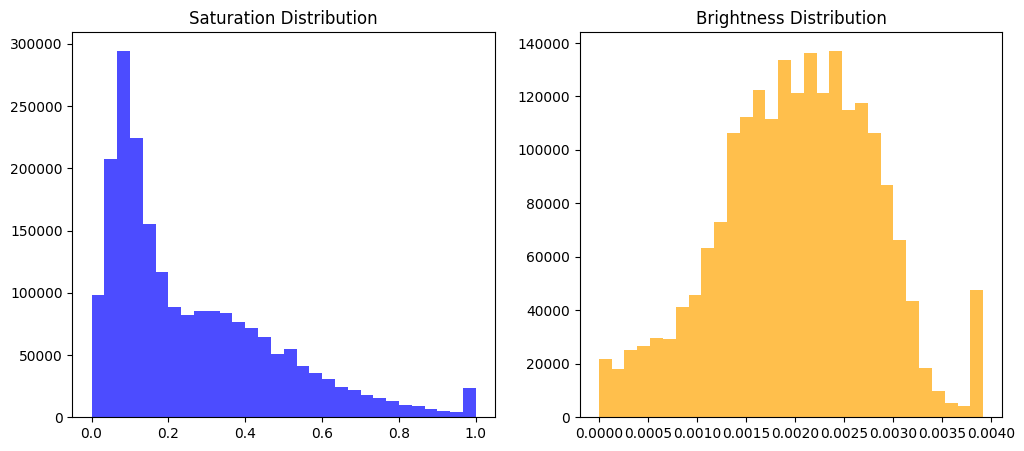

In [ ]:
#Saturation and Brightness Analysis: to convert images to HSV color space and analyze the saturation and brightness (value) distributions.
import matplotlib
def plot_saturation_brightness_distribution(images):
    saturation_values = []
    brightness_values = []
    for img in images:
        hsv_img = matplotlib.colors.rgb_to_hsv(img / 255.0)
        # Flatten the saturation channel and extend the list of saturation values.
        saturation_values.extend(hsv_img[:, :, 1].flatten())

        # Flatten the brightness channel (value channel in HSV) and extend the list of brightness values.
        brightness_values.extend(hsv_img[:, :, 2].flatten())

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(saturation_values, bins=30, color='blue', alpha=0.7)
    plt.title('Saturation Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(brightness_values, bins=30, color='orange', alpha=0.7)
    plt.title('Brightness Distribution')

    plt.show()

images, _ = next(data_loader)
plot_saturation_brightness_distribution(images)

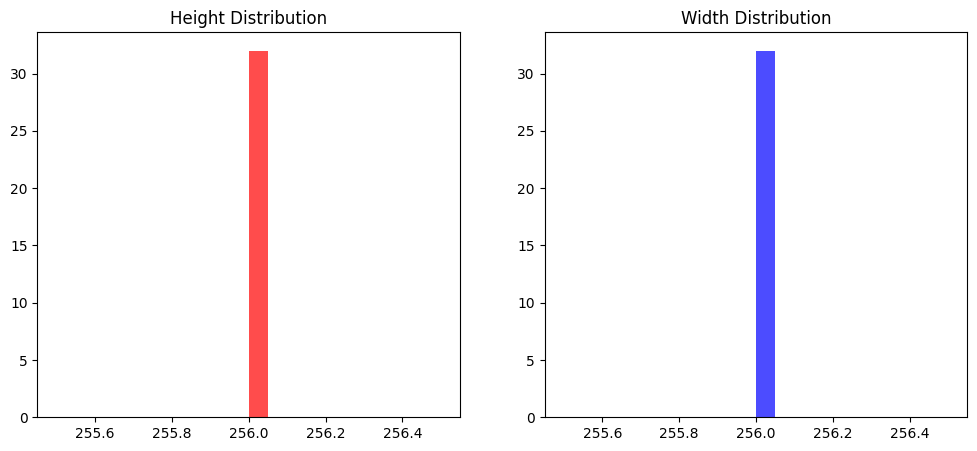

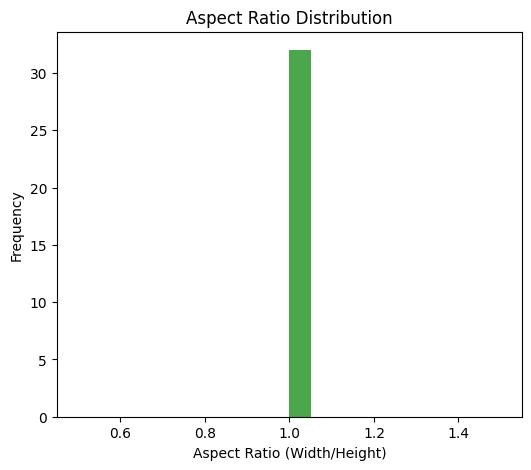

In [ ]:
# Size and Aspect Ratio Distribution: If images vary in size or aspect ratio, it's good to know their distribution.
def plot_size_aspect_ratio_distribution(images):
    sizes = [img.shape[:2] for img in images]
    aspect_ratios = [s[1]/s[0] for s in sizes]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist([s[0] for s in sizes], bins=20, color='red', alpha=0.7)
    plt.title('Height Distribution')

    plt.subplot(1, 2, 2)
    plt.hist([s[1] for s in sizes], bins=20, color='blue', alpha=0.7)
    plt.title('Width Distribution')

    plt.figure(figsize=(6, 5))
    plt.hist(aspect_ratios, bins=20, color='green', alpha=0.7)
    plt.title('Aspect Ratio Distribution')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')

    plt.show()

images, _ = next(data_loader)
plot_size_aspect_ratio_distribution(images)


**HSV Color Space Analysis: Saturation and Brightness Distributions**

The dual histogram illustrates the distributions of saturation and brightness in a dataset of images after conversion to the HSV color space. The left plot, depicting saturation, shows most images have low saturation levels with a significant peak near the zero mark, suggesting that many images may be closer to grayscale rather than vividly colored. On the right, the brightness histogram indicates a central tendency, with most images possessing moderate brightness levels. There is, however, a noticeable spike towards the higher end of the scale, which could represent a subset of images with high brightness.

### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

`1. The data is balanced, as all the categories have almost same number of images.`

` 2. The provided visual data indicates that there are no significant disparities in the input data. The dataset exhibits a pattern of careful curation, with each class of plant diseases and healthy plant states being well-represented. This balance is crucial for avoiding biases in the predictive model, ensuring that it can recognize all categories with equal accuracy. Additionally, the uniform dimensions of the images are evidence of standardization in the dataset, which is beneficial for consistent model performance across various plant conditions. These patterns underscore a robust foundation for the next stages of model training.`
